# Notebook pour l'explicabilité de modèles neuronaux

**Librairies**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical, plot_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import time

**Versions de librairies**

In [2]:
import sys
print(f"Python {sys.version}")
print(f"Keras Version: {keras.__version__}")
print(f"TensorFlow Version: {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Python 3.8.15 (default, Nov  4 2022, 15:16:59) [MSC v.1916 64 bit (AMD64)]
Keras Version: 2.10.0
TensorFlow Version: 2.10.1
Num GPUs Available:  1


## Modèle préentraîné VGG16

**Chargement du modèle**

In [3]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=True)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Lecture et affichage des images**

(1, 224, 224, 3)


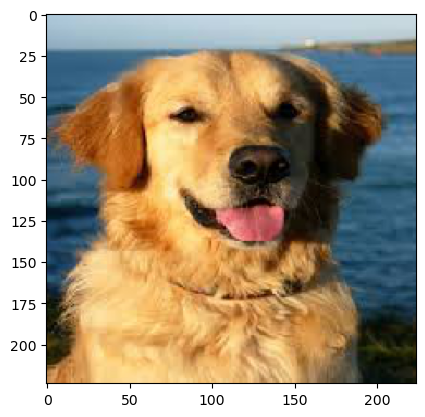

In [4]:
import keras.utils as image
img_width, img_height = 224, 224
#img = image.load_img('D:/Data/Images/Option_G.jpg', target_size = (img_width, img_height))
img = image.load_img('D:/Data/Images/chien.jpg', target_size = (img_width, img_height))
#img = image.img_to_array(img) # instruction sans doute inutile
img = np.expand_dims(img, axis = 0)
#img = preprocess_input(img) # comparer la prédiction avec et sans ce preprocessing pour voir qu'il est nécessaire
print(img.shape)
plt.imshow(img[0,:])

**Application du modèle (sans transfer learning)**

In [5]:
preds = base_model.predict(img)
# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 20s 20s/step
Predicted: [('n02104029', 'kuvasz', 0.4531688), ('n02099601', 'golden_retriever', 0.31389073), ('n02101388', 'Brittany_spaniel', 0.089481704)]


# Explication de la prédiction avec LIME

In [3]:
#pip install lime

     -------------------------------------- 275.7/275.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.5/78.5 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 12.2/12.2 MB 4.4 MB/s eta 0:00:00
     ------------------------------------- 210.3/210.3 kB 12.5 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 6.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=a317b352e847aa7ed44f9c1c69ce159b39673c558a33aaf0422475188c75c363
  Stored in directory: c:\users\tuffe\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime
Note: you may need to restart the kernel t

In [6]:
# https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
# https://github.com/marcellusruben/medium-resources/blob/main/Lime/LIME_image_class.ipynb
# https://github.com/klemag/PyconUS_2019-model-interpretability-tutorial/blob/master/02-interpretability_LIME-skeleton.ipynb
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

D:\anaconda3\envs\deepgpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
explainer = lime_image.LimeImageExplainer()

In [79]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
#explanation = explainer.explain_instance(img[0], base_model.predict, top_labels=5, hide_color=0, num_samples=1000)
explanation = explainer.explain_instance(img[0], base_model.predict, top_labels=1, hide_color=0, num_samples=1000, num_features=100, batch_size=10, random_seed=123)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 83ms/step


  1%|          | 10/1000 [00:00<00:46, 21.09it/s]

1/1 [==============================] - 0s 85ms/step


  2%|▏         | 20/1000 [00:00<00:38, 25.65it/s]

1/1 [==============================] - 0s 78ms/step


  3%|▎         | 30/1000 [00:01<00:31, 30.93it/s]

1/1 [==============================] - 0s 69ms/step


  4%|▍         | 40/1000 [00:01<00:28, 34.09it/s]

1/1 [==============================] - 0s 78ms/step


  5%|▌         | 50/1000 [00:01<00:26, 35.99it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▌         | 60/1000 [00:01<00:24, 37.88it/s]

1/1 [==============================] - 0s 85ms/step


  7%|▋         | 70/1000 [00:02<00:23, 39.13it/s]

1/1 [==============================] - 0s 85ms/step


  8%|▊         | 80/1000 [00:02<00:23, 39.53it/s]

1/1 [==============================] - 0s 62ms/step


  9%|▉         | 90/1000 [00:02<00:23, 39.49it/s]

1/1 [==============================] - 0s 80ms/step


 10%|█         | 100/1000 [00:02<00:22, 39.73it/s]

1/1 [==============================] - 0s 71ms/step


 11%|█         | 110/1000 [00:03<00:22, 40.10it/s]

1/1 [==============================] - 0s 71ms/step


 12%|█▏        | 120/1000 [00:03<00:21, 40.30it/s]

1/1 [==============================] - 0s 85ms/step


 13%|█▎        | 130/1000 [00:03<00:21, 40.34it/s]

1/1 [==============================] - 0s 78ms/step


 14%|█▍        | 140/1000 [00:03<00:21, 40.21it/s]

1/1 [==============================] - 0s 122ms/step


 15%|█▌        | 150/1000 [00:04<00:29, 29.07it/s]

1/1 [==============================] - 0s 129ms/step


 16%|█▌        | 160/1000 [00:04<00:33, 25.38it/s]

1/1 [==============================] - 0s 73ms/step


 17%|█▋        | 170/1000 [00:05<00:29, 28.18it/s]

1/1 [==============================] - 0s 71ms/step


 18%|█▊        | 180/1000 [00:05<00:26, 30.85it/s]

1/1 [==============================] - 0s 81ms/step


 19%|█▉        | 190/1000 [00:05<00:24, 33.06it/s]

1/1 [==============================] - 0s 73ms/step


 20%|██        | 200/1000 [00:05<00:22, 35.16it/s]

1/1 [==============================] - 0s 71ms/step


 21%|██        | 210/1000 [00:06<00:21, 36.78it/s]

1/1 [==============================] - 0s 73ms/step


 22%|██▏       | 220/1000 [00:06<00:20, 37.67it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 230/1000 [00:06<00:19, 39.07it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██▍       | 240/1000 [00:06<00:19, 39.17it/s]

1/1 [==============================] - 0s 80ms/step


 25%|██▌       | 250/1000 [00:07<00:18, 39.50it/s]

1/1 [==============================] - 0s 121ms/step


 26%|██▌       | 260/1000 [00:07<00:22, 32.19it/s]

1/1 [==============================] - 0s 121ms/step


 27%|██▋       | 270/1000 [00:08<00:26, 27.32it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 280/1000 [00:08<00:29, 24.57it/s]

1/1 [==============================] - 0s 71ms/step


 29%|██▉       | 290/1000 [00:08<00:25, 27.73it/s]

1/1 [==============================] - 0s 71ms/step


 30%|███       | 300/1000 [00:09<00:22, 30.47it/s]

1/1 [==============================] - 0s 79ms/step


 31%|███       | 310/1000 [00:09<00:20, 33.03it/s]

1/1 [==============================] - 0s 81ms/step


 32%|███▏      | 320/1000 [00:09<00:19, 35.12it/s]

1/1 [==============================] - 0s 71ms/step


 33%|███▎      | 330/1000 [00:09<00:18, 36.74it/s]

1/1 [==============================] - 0s 71ms/step


 34%|███▍      | 340/1000 [00:09<00:17, 37.99it/s]

1/1 [==============================] - 0s 71ms/step


 35%|███▌      | 350/1000 [00:10<00:16, 38.52it/s]

1/1 [==============================] - 0s 79ms/step


 36%|███▌      | 360/1000 [00:10<00:16, 39.19it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 370/1000 [00:11<00:21, 29.31it/s]

1/1 [==============================] - 0s 130ms/step


 38%|███▊      | 380/1000 [00:11<00:24, 25.76it/s]

1/1 [==============================] - 0s 81ms/step


 39%|███▉      | 390/1000 [00:11<00:21, 27.77it/s]

1/1 [==============================] - 0s 71ms/step


 40%|████      | 400/1000 [00:12<00:19, 30.48it/s]

1/1 [==============================] - 0s 81ms/step


 41%|████      | 410/1000 [00:12<00:18, 32.74it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████▏     | 420/1000 [00:12<00:16, 34.54it/s]

1/1 [==============================] - 0s 91ms/step


 43%|████▎     | 430/1000 [00:12<00:16, 35.54it/s]

1/1 [==============================] - 0s 142ms/step


 44%|████▍     | 440/1000 [00:13<00:20, 27.99it/s]

1/1 [==============================] - 0s 132ms/step


 45%|████▌     | 450/1000 [00:13<00:22, 24.86it/s]

1/1 [==============================] - 0s 79ms/step


 46%|████▌     | 460/1000 [00:14<00:19, 28.04it/s]

1/1 [==============================] - 0s 69ms/step


 47%|████▋     | 470/1000 [00:14<00:17, 31.04it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 480/1000 [00:14<00:15, 33.36it/s]

1/1 [==============================] - 0s 85ms/step


 49%|████▉     | 490/1000 [00:14<00:14, 35.55it/s]

1/1 [==============================] - 0s 85ms/step


 50%|█████     | 500/1000 [00:15<00:13, 36.88it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 510/1000 [00:15<00:12, 37.75it/s]

1/1 [==============================] - 0s 69ms/step


 52%|█████▏    | 520/1000 [00:15<00:12, 38.62it/s]

1/1 [==============================] - 0s 69ms/step


 53%|█████▎    | 530/1000 [00:15<00:12, 39.14it/s]

1/1 [==============================] - 0s 78ms/step


 54%|█████▍    | 540/1000 [00:16<00:11, 39.47it/s]

1/1 [==============================] - 0s 131ms/step


 55%|█████▌    | 550/1000 [00:16<00:14, 31.47it/s]

1/1 [==============================] - 0s 122ms/step


 56%|█████▌    | 560/1000 [00:17<00:16, 26.89it/s]

1/1 [==============================] - 0s 124ms/step


 57%|█████▋    | 570/1000 [00:17<00:17, 24.24it/s]

1/1 [==============================] - 0s 77ms/step


 58%|█████▊    | 580/1000 [00:17<00:15, 27.10it/s]

1/1 [==============================] - 0s 85ms/step


 59%|█████▉    | 590/1000 [00:18<00:13, 29.92it/s]

1/1 [==============================] - 0s 73ms/step


 60%|██████    | 600/1000 [00:18<00:12, 32.24it/s]

1/1 [==============================] - 0s 81ms/step


 61%|██████    | 610/1000 [00:18<00:11, 34.40it/s]

1/1 [==============================] - 0s 71ms/step


 62%|██████▏   | 620/1000 [00:18<00:10, 35.88it/s]

1/1 [==============================] - 0s 79ms/step


 63%|██████▎   | 630/1000 [00:19<00:09, 37.20it/s]

1/1 [==============================] - 0s 81ms/step


 64%|██████▍   | 640/1000 [00:19<00:09, 38.31it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 650/1000 [00:19<00:08, 38.99it/s]

1/1 [==============================] - 0s 131ms/step


 66%|██████▌   | 660/1000 [00:20<00:11, 30.32it/s]

1/1 [==============================] - 0s 116ms/step


 67%|██████▋   | 670/1000 [00:20<00:12, 25.92it/s]

1/1 [==============================] - 0s 72ms/step


 68%|██████▊   | 680/1000 [00:20<00:11, 27.92it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▉   | 690/1000 [00:21<00:09, 31.10it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████   | 700/1000 [00:21<00:08, 33.41it/s]

1/1 [==============================] - 0s 69ms/step


 71%|███████   | 710/1000 [00:21<00:08, 35.58it/s]

1/1 [==============================] - 0s 69ms/step


 72%|███████▏  | 720/1000 [00:21<00:07, 36.91it/s]

1/1 [==============================] - 0s 116ms/step


 73%|███████▎  | 730/1000 [00:22<00:08, 31.78it/s]

1/1 [==============================] - 0s 116ms/step


 74%|███████▍  | 740/1000 [00:22<00:09, 27.16it/s]

1/1 [==============================] - 0s 116ms/step


 75%|███████▌  | 750/1000 [00:23<00:10, 24.58it/s]

1/1 [==============================] - 0s 69ms/step


 76%|███████▌  | 760/1000 [00:23<00:08, 27.70it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 770/1000 [00:23<00:07, 30.59it/s]

1/1 [==============================] - 0s 78ms/step


 78%|███████▊  | 780/1000 [00:24<00:06, 33.14it/s]

1/1 [==============================] - 0s 69ms/step


 79%|███████▉  | 790/1000 [00:24<00:05, 35.25it/s]

1/1 [==============================] - 0s 85ms/step


 80%|████████  | 800/1000 [00:24<00:05, 37.01it/s]

1/1 [==============================] - 0s 78ms/step


 81%|████████  | 810/1000 [00:24<00:05, 35.46it/s]

1/1 [==============================] - 0s 85ms/step


 82%|████████▏ | 820/1000 [00:25<00:04, 37.19it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████▎ | 830/1000 [00:25<00:04, 38.11it/s]

1/1 [==============================] - 0s 131ms/step


 84%|████████▍ | 840/1000 [00:25<00:05, 29.93it/s]

1/1 [==============================] - 0s 126ms/step


 85%|████████▌ | 850/1000 [00:26<00:05, 25.97it/s]

1/1 [==============================] - 0s 72ms/step


 86%|████████▌ | 860/1000 [00:26<00:04, 28.23it/s]

1/1 [==============================] - 0s 85ms/step


 87%|████████▋ | 870/1000 [00:26<00:04, 30.41it/s]

1/1 [==============================] - 0s 85ms/step


 88%|████████▊ | 880/1000 [00:27<00:03, 32.85it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 890/1000 [00:27<00:03, 34.57it/s]

1/1 [==============================] - 0s 85ms/step


 90%|█████████ | 900/1000 [00:27<00:02, 35.54it/s]

1/1 [==============================] - 0s 132ms/step


 91%|█████████ | 910/1000 [00:28<00:03, 28.25it/s]

1/1 [==============================] - 0s 122ms/step


 92%|█████████▏| 920/1000 [00:28<00:03, 25.11it/s]

1/1 [==============================] - 0s 69ms/step


 93%|█████████▎| 930/1000 [00:28<00:02, 27.60it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▍| 940/1000 [00:29<00:01, 30.32it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████▌| 950/1000 [00:29<00:01, 32.78it/s]

1/1 [==============================] - 0s 81ms/step


 96%|█████████▌| 960/1000 [00:29<00:01, 35.02it/s]

1/1 [==============================] - 0s 71ms/step


 97%|█████████▋| 970/1000 [00:29<00:00, 36.30it/s]

1/1 [==============================] - 0s 132ms/step


 98%|█████████▊| 980/1000 [00:30<00:00, 27.61it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████▉| 990/1000 [00:30<00:00, 24.54it/s]

1/1 [==============================] - 0s 71ms/step


100%|██████████| 1000/1000 [00:31<00:00, 32.02it/s]

CPU times: total: 32.5 s
Wall time: 31.8 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

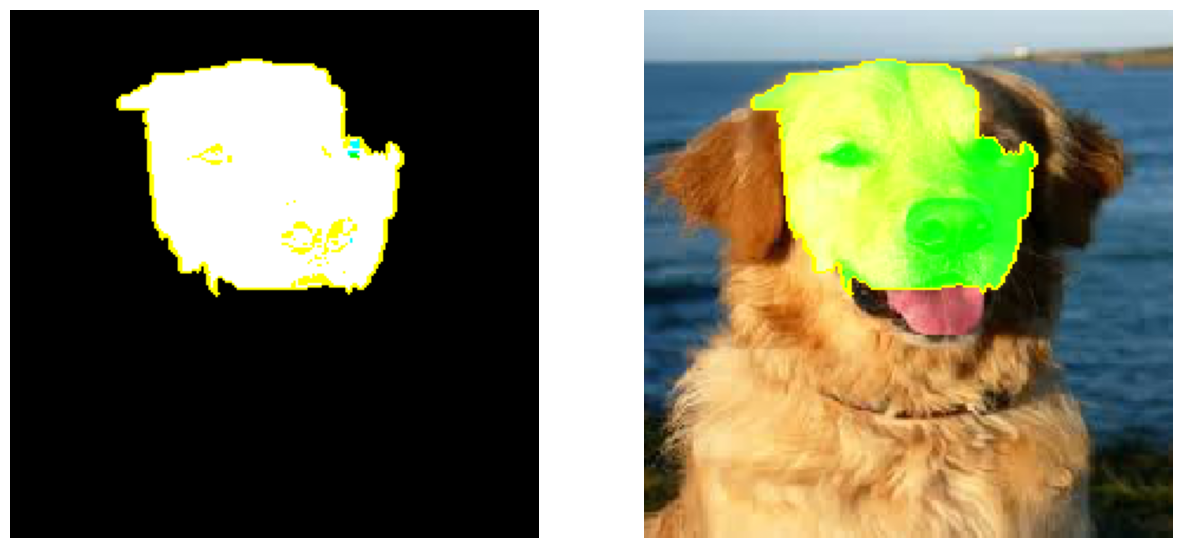

In [80]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

**Superpixels le plus dans le sens de la prédiction**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


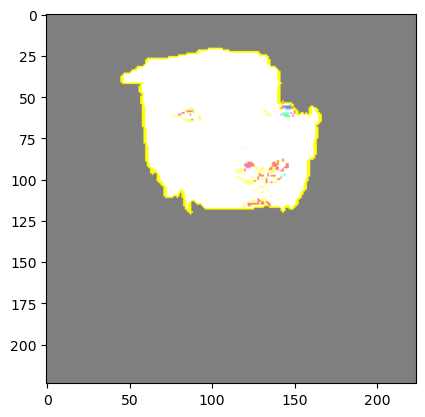

In [75]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**Superpixels le plus dans le sens de la prédiction (avec les autres superpixels)**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


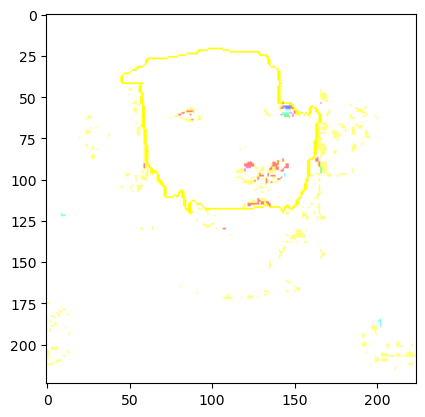

In [76]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**Superpixels dans le sens de la prédiction (en vert) ou opposés (en rouge)**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


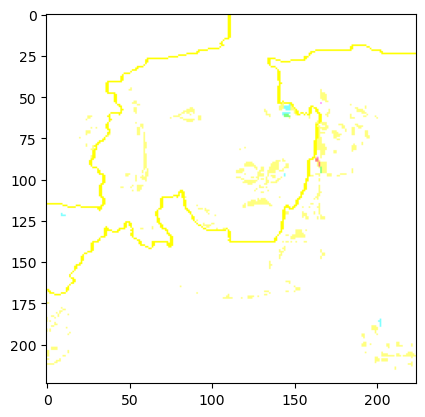

In [77]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

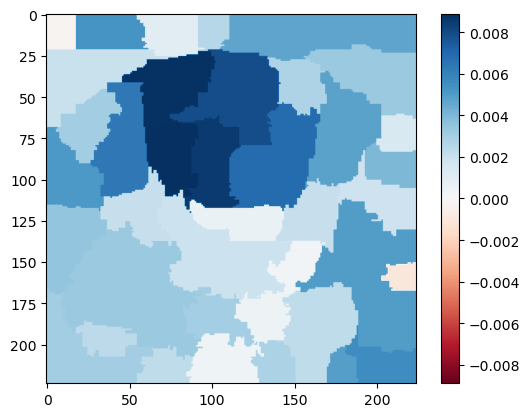

In [81]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [58]:
explanation.local_exp[ind]

[(9, 0.010694335949866218),
 (16, 0.010088483694958397),
 (8, 0.008158912343964398),
 (15, 0.0077815079378268015),
 (11, 0.006550920491495657),
 (13, 0.005741696957099834),
 (1, 0.004995155350482821),
 (21, 0.004963113727935567),
 (28, 0.004457861180460906),
 (5, 0.0041369559246373245),
 (39, 0.004082714267642755),
 (10, 0.003915663435417471),
 (2, 0.003449017734463393),
 (26, 0.0030733910059212804),
 (37, 0.002955109021367454),
 (19, 0.002938255874087156),
 (22, 0.0028807418480909846),
 (38, 0.002862307128897735),
 (7, 0.002748053889685138),
 (4, 0.002731254417811694),
 (25, 0.0025130207554535937),
 (0, 0.002461953224728483),
 (33, 0.0024468066651806854),
 (27, 0.002083443645837925),
 (29, 0.001922813807876867),
 (35, 0.0018860589225239233),
 (31, 0.0016410952689999377),
 (14, 0.0014321235191734776),
 (6, -0.001257426358448219),
 (17, 0.001049089396389527),
 (20, 0.0010423709058890234),
 (23, 0.0008549155660715626),
 (3, 0.0008336079557468128),
 (30, 0.0008114935842355082),
 (12, -0.0

In [67]:
print(explanation.segments

[[ 2  2  2 ...  1  1  1]
 [ 2  2  2 ...  1  1  1]
 [ 2  2  2 ...  1  1  1]
 ...
 [36 36 36 ... 38 38 38]
 [36 36 36 ... 38 38 38]
 [36 36 36 ... 38 38 38]]


**prédiction locale de LIME**

In [49]:
explanation.intercept[ind] + sum([weight[1] for weight in explanation.local_exp[ind]])

0.08102400438004954

In [33]:
explanation.top_labels[0]

222

In [50]:
%whos

Variable             Type                  Data/Info
----------------------------------------------------
VGG16                function              <function VGG16 at 0x00000297F1A1DB80>
ax1                  AxesSubplot           AxesSubplot(0.125,0.318864;0.352273x0.352273)
ax2                  AxesSubplot           AxesSubplot(0.547727,0.318864;0.352273x0.352273)
base_model           Functional            <keras.engine.functional.<...>ct at 0x0000029781E52040>
decode_predictions   function              <function decode_predicti<...>ns at 0x00000297F1A1DCA0>
dict_heatmap         dict                  n=40
explainer            LimeImageExplainer    <lime.lime_image.LimeImag<...>ct at 0x0000029844FA0FD0>
explanation          ImageExplanation      <lime.lime_image.ImageExp<...>ct at 0x0000029846F77100>
fig                  Figure                Figure(1500x1500)
heatmap              ndarray               224x224: 50176 elems, type `float64`, 401408 bytes (392.0 kb)
image                